#__Regresión Lineal__

##__Principios generales__

Nuestro objetivo es lograr predecir el valor cuantitativo de una variable de respuesta $Y$ a partir de $n$ predictores $X_1, X_2, \dots , X_n$. Suponemos que existe una relación entre $Y$ y $X = (X_1, X_2, \dots , X_n)$. Esto puede se escrito como:

$$h_\theta(X) = f(X) + ϵ$$

donde $f(X)$ e suna función desconocida y $ϵ$ es el término que representa el error aleatorio el cual es independiente de $X$ y tiene media $0$. En el caso de la regresión lineal supondremos que las relación entre $X$ y $Y$ es de tipo lineal y por lo tanto se puede expresar como:


$$h_\theta(X) ≈ \theta_0 + \theta_1X$$

In [68]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns

Supongamos que la relación real entre un conjunto de datos es de tipo lineal y está dada por la función  $f(x)= \frac{5}{2}x$ y que $ϵ$ sigue una distribución normal con $\mu = 0$ y $σ$ = 1.0. Al generar una muestra aleatoria de tamaño $100$ en el intervalo $[-2,2]$ obtendríamos los siguientes valores:

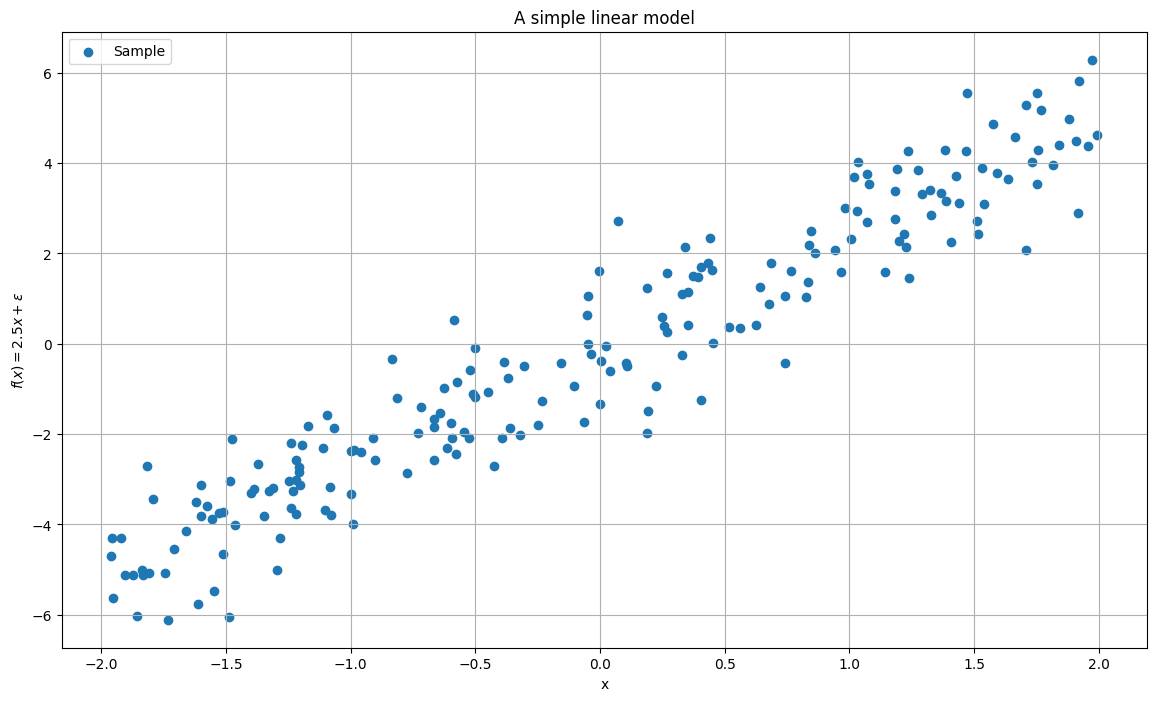

In [69]:
f = lambda x :  2.5 * x
sample_size = 200
mu = 0
std = 1.0

X = np.random.uniform(-2, 2, sample_size)
X.sort()
Y = np.array([f(x) + np.random.normal(mu, std) for x in X])


plt.figure(figsize=(14, 8))
plt.scatter(X, Y, label='Sample')
#plt.plot(X, [f(i) for i in X], color='r', label='Real relatioship')
plt.xlabel('x')
plt.ylabel('$f(x) = 2.5x + \epsilon$')
plt.grid()
plt.legend()
plt.title('A simple linear model')
plt.show()

Veamos como cambia la distribución de puntos en la medida que camiba la varianza

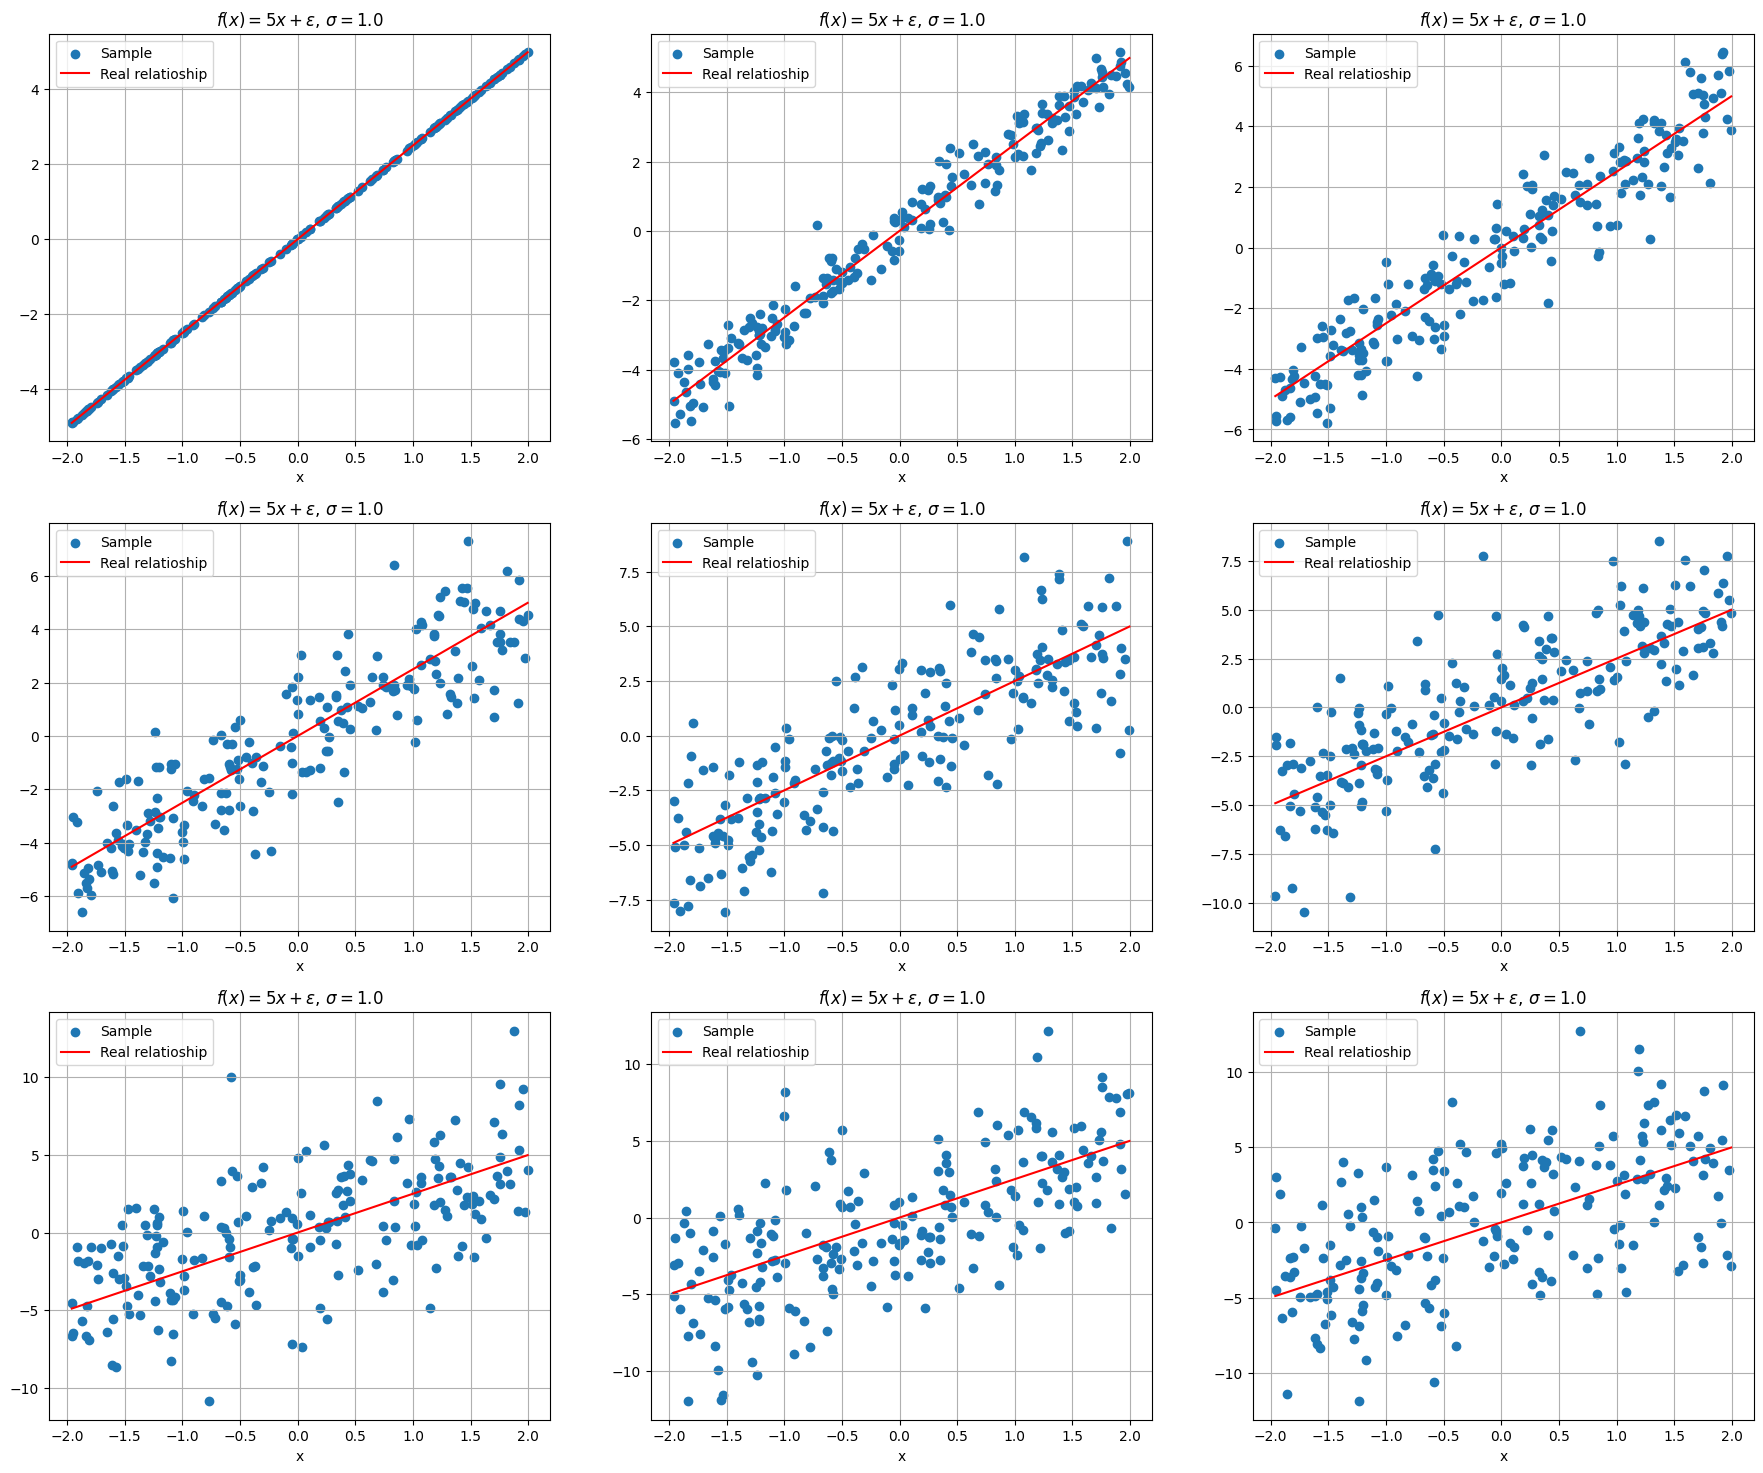

In [70]:
fig, axes = plt.subplots(3, 3,  figsize=(22,18))

cells = [(i,j) for i in range(3) for j in range(3)]
std_ = 0

for i, j in cells:
  Y_ = np.array([f(x) + np.random.normal(mu, std_) for x in X])
  axes[i][j].scatter(X, Y_, label='Sample')
  axes[i][j].plot(X, [f(i) for i in X], color='r', label='Real relatioship')
  axes[i][j].set_xlabel('x')
  axes[i][j].set_title(f'$f(x) = 5x + \epsilon$, $\sigma = {round(std, 2)}$')
  axes[i][j].grid()
  axes[i][j].legend()
  std_ += 0.5
plt.show()

##__Regresión lineal desde cero__#

### __Gradiente descendente__

El objetivo del gradiente descendente es minimizar el valor de la función de costo

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2$$
donde la hipóstesis $h_{\theta}(x)$ está representada por:


 $$h_{\theta}(x)=  \theta^{T}X = \theta_{0} + \theta_{1}x_1$$

Recuerde que los parámetros de nuestro modelo son los valores de $\theta$. Estos valores se iran ajustando en la medida que se minimiza $J(\theta)$. Actualizaremos los valores de $\theta_j$ de manera iterativa con:

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})\cdot x_j^{(i)}$$

Es importante actualizar los valores de $\theta_j$ de manera simultanea. De esta forma, en cada paso del gradiente descendente irá aproximando $\theta_j$ a  los valor óptimos.

__Nota:__ Cada uno de los datos de la muestra se almacenará como una fila de la matrix $X$. Para poder manipular el intercepto  ($\theta_0$) se agregará una fila adicional de unos. Esto permitirá manipular $X_0$ como si fuera otra variable del modelo fija en 1.




In [71]:
# Agregando una columna adicional de unos para el intercepto
m = sample_size
X = X.reshape(-1,1)
X = np.hstack((np.ones((m, 1)),X))

# Inicializamos los valores de los coeficientes
theta = np.array([75.0, -75.0])

Definamos la función de costo $J(\theta)$

In [72]:
def compute_cost(x, y, theta):

    m = len(y)
    J = np.sum(np.square(x.dot(theta) - y)) / (2.0 * m)
    return J

In [73]:
cost = compute_cost(X, Y, theta)
print('The cost on initial theta:', cost)

The cost on initial theta: 7227.719182428564


In [74]:
def gradient_descent(X, Y, theta, alpha=0.01, num_iters=1500, epsilon=0.001):

    m = len(Y)
    J_history = list()
    theta_history = list()

    for i in range(num_iters):
      if((i > 1) and (abs(J_history[i-1] - J_history[i-2]) <= epsilon)):
        break
      theta -= alpha / m * ((X.dot(theta) - Y).T.dot(X))
      theta_history.append(theta.copy())
      J_history.append(compute_cost(X, Y, theta))

    return theta.copy(), J_history, theta_history

Al probar los métodos implementados obtenermos los siguientes valores para los coeficientes

In [75]:
theta, J_history, theta_history = gradient_descent(X, Y, theta)
print ("Theta computed from gradient descent:", theta)

Theta computed from gradient descent: [0.18528676 2.49244975]


Visualizando la función de costo $J(\theta)$

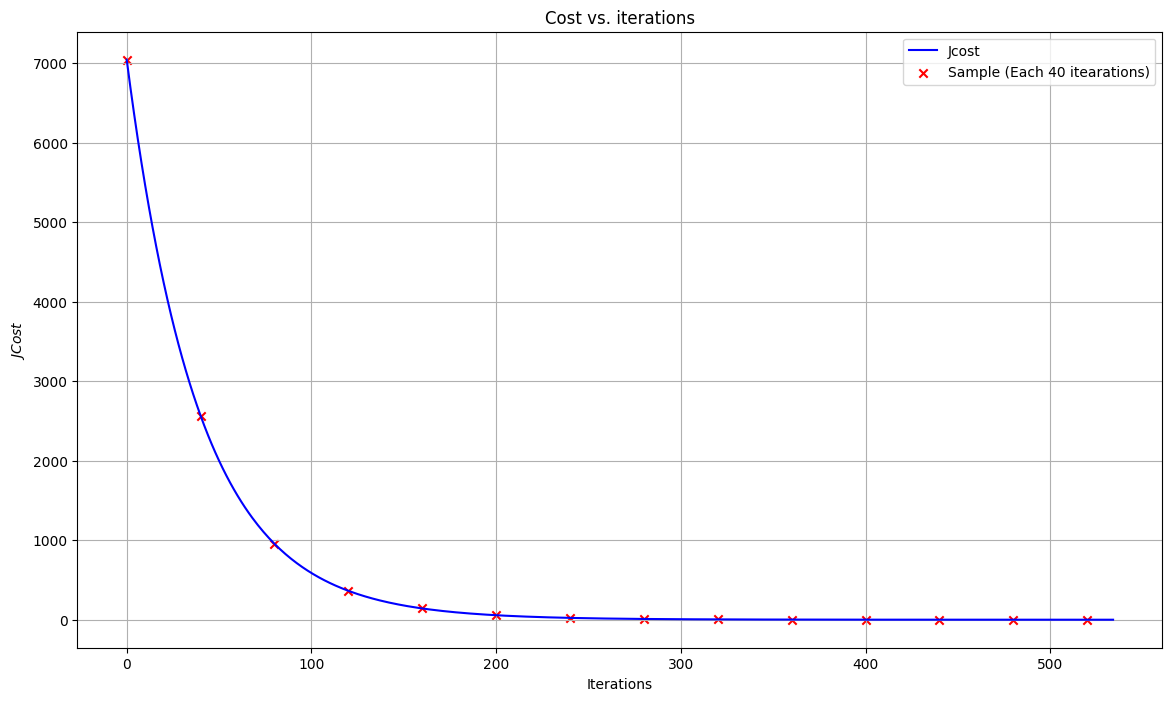

In [76]:
plt.figure(figsize=(14, 8))
plt.plot([i for i in range(len(J_history))], J_history, linestyle='-', color='b', label='Jcost')
plt.scatter([i for i in range(0, len(J_history), 40)], J_history[:len(J_history): 40], marker='x', color='r', label='Sample (Each 40 itearations)')
plt.xlabel('Iterations')
plt.ylabel('$JCost$')
plt.legend()
plt.title("Cost vs. iterations")
plt.grid()

Visualizando los cambios de la función obtenida.

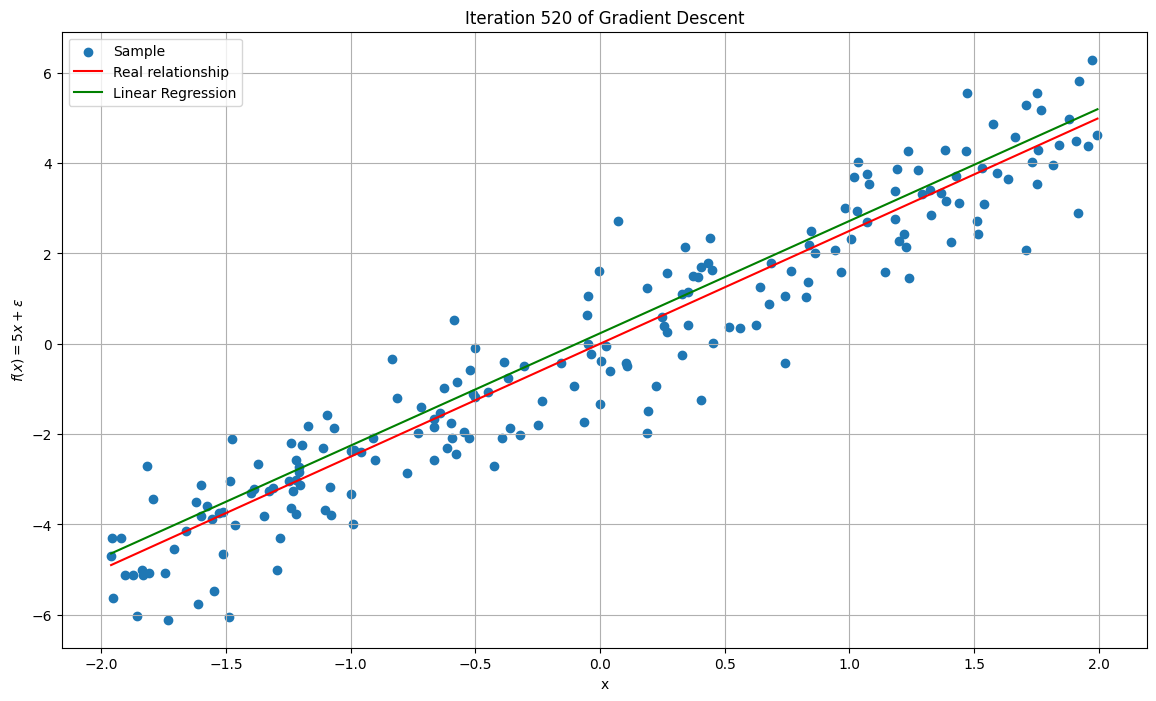

In [77]:
from IPython.display import clear_output

for i in range(100, len(theta_history), 30):
  plt.figure(figsize=(14, 8))
  clear_output(wait=True)
  plt.scatter(X[:, 1], Y, label='Sample')
  plt.plot(X[:, 1], [f(i) for i in X[:, 1]], color='r', label='Real relationship')
  plt.plot(X[:, 1], X.dot(theta_history[i]), color='green', label='Linear Regression')
  plt.xlabel('x')
  plt.ylabel('$f(x) = 5x + \epsilon$')
  plt.grid()
  plt.legend()
  plt.title(f'Iteration {i} of Gradient Descent')
  plt.pause(0.05)

Visualizando Los residuos del modelo obtenido

Visualizando $J(\theta)$

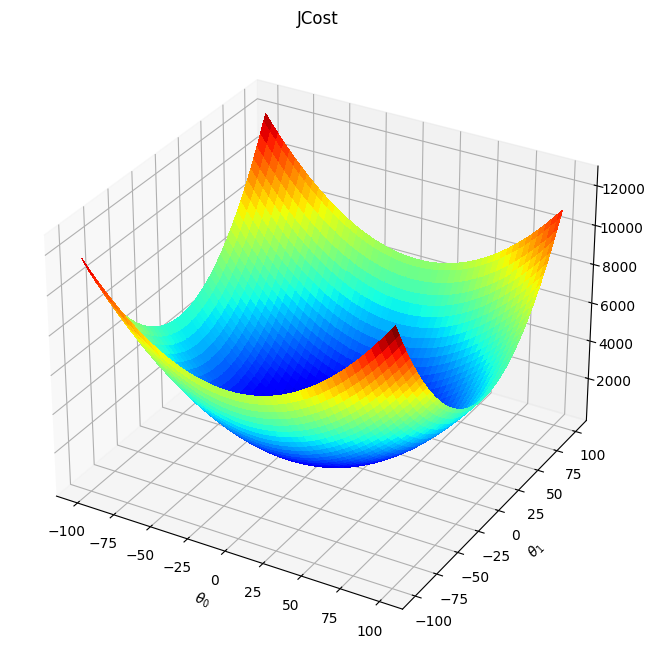

In [78]:
# Grid over which we will calculate J

theta0_vals = np.linspace(-100, 100, 100)
theta1_vals = np.linspace(-100, 100, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out j_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = compute_cost(X, Y, t)

# We need to transpose J_vals before calling plot_surface, or else the axes will be flipped.
J_vals = J_vals.T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Surface plot
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=2, cstride=2, cmap=cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title('JCost')
plt.show()


Visualizando los contornos de $J(\theta)$

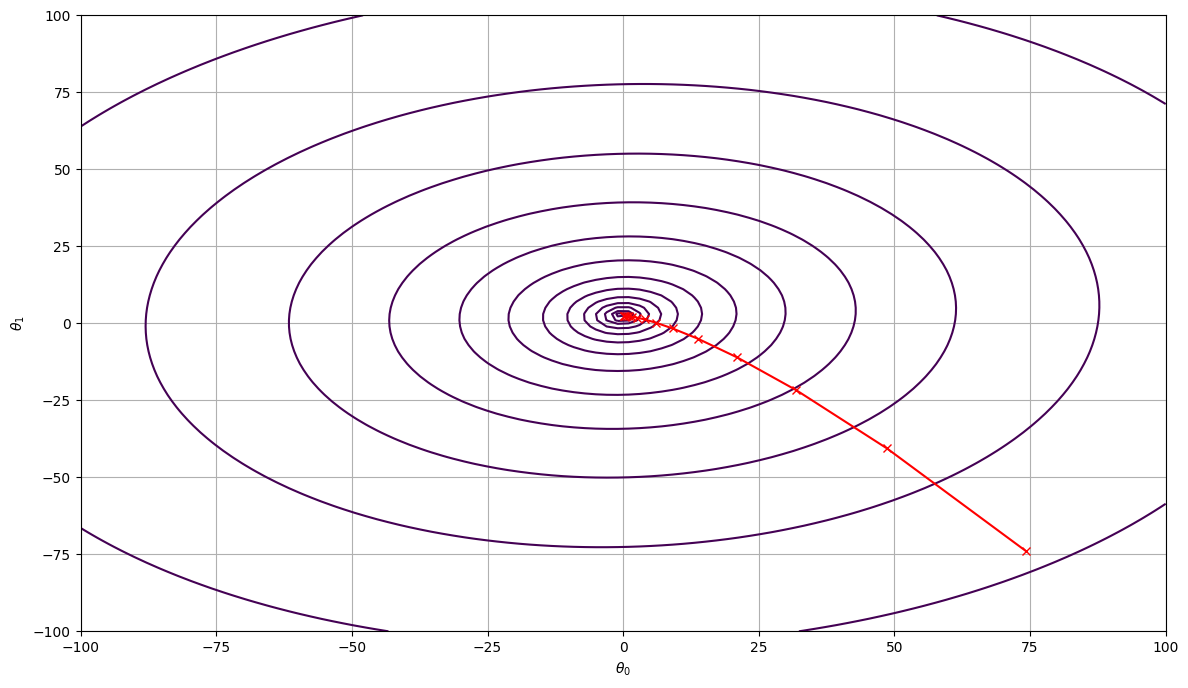

In [79]:
theta_x = [x[0] for x in theta_history]
theta_y = [x[1] for x in theta_history]

plt.figure(figsize=(14, 8))

# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 7, 30))
plt.plot(theta_x[::40], theta_y[::40], linestyle='-', marker='x', color='r')
plt.plot(theta_x[-1], theta_y[-1], linestyle='-', marker='x', color='r')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.grid()
plt.show()

#__Regresión lineal - Sckit-Learn__

Una idea general de como funciona sckit-learn:

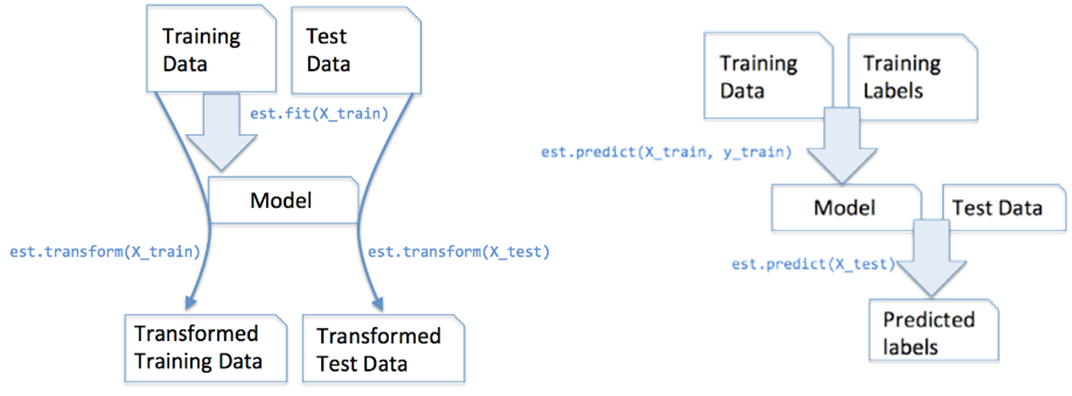

Veamos un ejemplo utilizando la clase `LinearRegression` la cual utiliza mínimos cuadrados ordinarios.

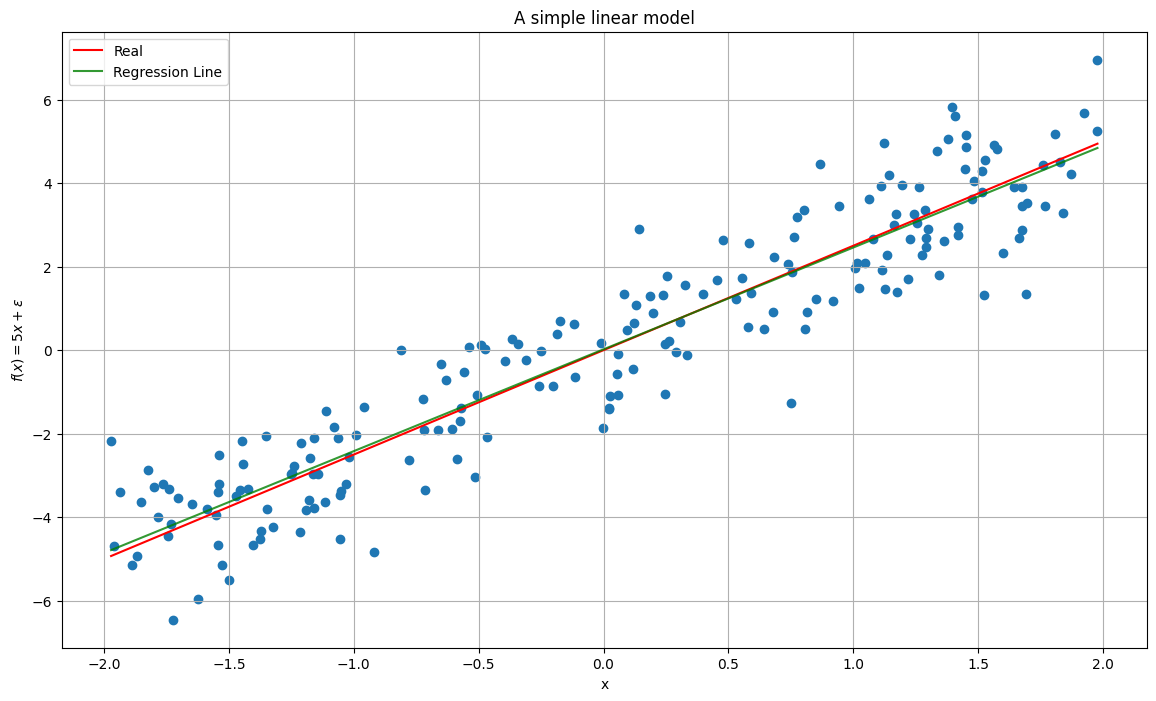

In [80]:
from sklearn.linear_model import LinearRegression

f = lambda x :  2.5 * x
sample_size = 200
X = np.random.uniform(-2, 2, sample_size)
X.sort()

Y = np.array([f(x) + np.random.normal(mu,std) for x in X])
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

lr = LinearRegression()
lr.fit(X, Y)
y_pred = lr.predict(X)

plt.figure(figsize=(14, 8))
plt.scatter(X, Y)
plt.plot(X, [f(i) for i in X], color='r', label='Real')
plt.plot(X, y_pred, color='green', alpha= 0.8, label='Regression Line')
plt.xlabel('x')
plt.ylabel('$f(x) = 5x + \epsilon$')
plt.grid()
plt.legend()
plt.title('A simple linear model')
plt.show()

Visualizando el gráfico de residuos

También es posible utilizar sckit-learn para calcular las métricas de desempeño disponibles para regresión

In [81]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

train_score = lr.score(X, Y)
print("Coefficient of determination in the training set: ", train_score)
print('MAE:', mean_absolute_error(Y, y_pred))
print('MSE:', mean_squared_error(Y, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y, y_pred)))

Coefficient of determination in the training set:  0.8763133736432928
MAE: 0.8731077602971328
MSE: 1.154682563382525
RMSE: 1.0745615679813443


También es posible utilizar la clase `SGDRegressor` si queremos utilizar el algoritmo de gradiente descendete para problemas de regresión.

C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


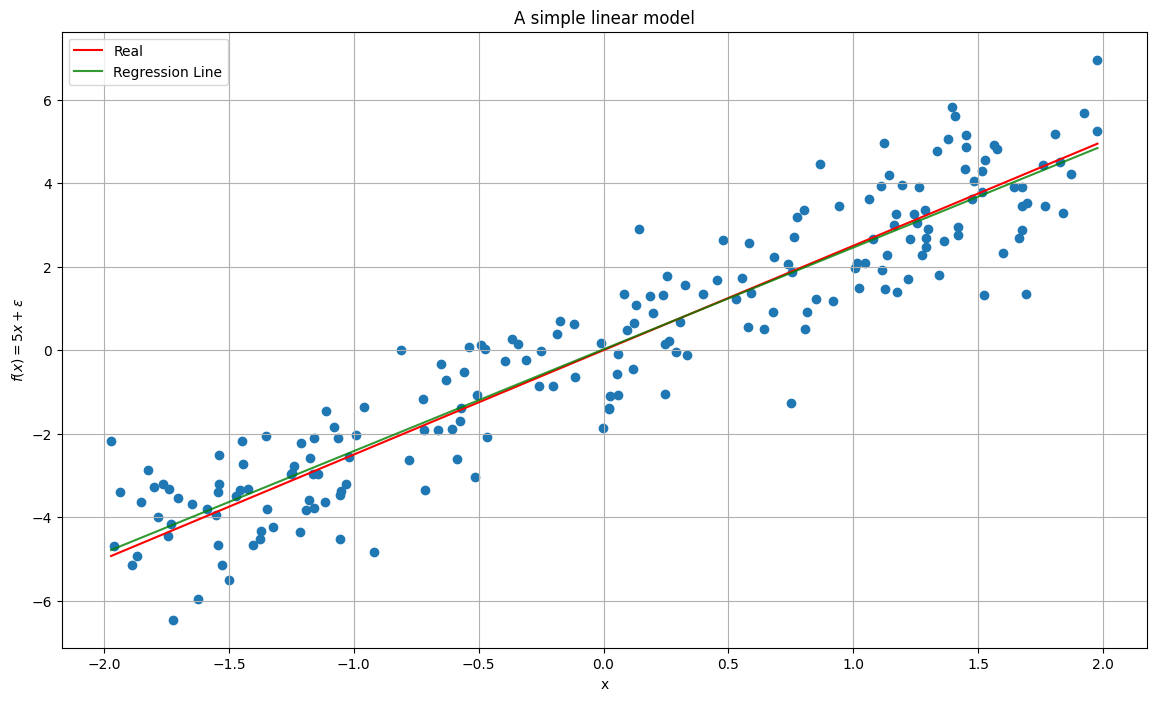

In [82]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()

sgd.fit(X, Y)
y_pred = sgd.predict(X)

plt.figure(figsize=(14, 8))
plt.scatter(X, Y)
plt.plot(X, [f(i) for i in X], color='r', label='Real')
plt.plot(X, y_pred, color='green', alpha= 0.8, label='Regression Line')
plt.xlabel('x')
plt.ylabel('$f(x) = 5x + \epsilon$')
plt.grid()
plt.legend()
plt.title('A simple linear model')
plt.show()

In [83]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

train_score = lr.score(X, Y)
print("Coefficient of determination in the training set: ", train_score)
print('MAE:', mean_absolute_error(Y, y_pred))
print('MSE:', mean_squared_error(Y, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y, y_pred)))

Coefficient of determination in the training set:  0.8763133736432928
MAE: 0.8730297679856082
MSE: 1.1546837103063416
RMSE: 1.0745621016518039


# Ejercicio en clase

In [84]:
df=pd.read_csv('https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/advertising2.csv')

In [85]:
df['Sales'] = df['Sales'].str.replace(',', '.')

In [86]:
df['Sales'] = df['Sales'].astype(float)

In [87]:
df.dropna(inplace=True)

In [88]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [89]:
# Generó los conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

train, test =train_test_split(df, test_size=0.2, random_state=45, shuffle=True)

In [90]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocessor = Pipeline(
    steps=[("numerical_imputer", SimpleImputer(strategy='mean')),
           ("scaler", StandardScaler())])

In [91]:
train_dataset = preprocessor.fit_transform(train[['TV', 'Radio', 'Newspaper']])
train_dataset = pd.DataFrame(train_dataset, columns=['TV', 'Radio', 'Newspaper'], index=train.index)
train_dataset['Sales'] = train['Sales']
train_dataset.head()

,TV,Radio,Newspaper,Sales
103,-0.547625,-0.966479,-1.273811,10.7
182,0.594832,1.743220,1.306928,23.7
145,1.368455,-0.258417,-1.424811,17.4
72,-0.860786,-0.462666,-0.848263,10.9
183,0.949747,0.579002,1.956688,19.7


In [92]:
train_dataset.describe()

,TV,Radio,Newspaper,Sales
count,1.600000e+02,1.600000e+02,1.600000e+02,160.000000
mean,-9.436896e-17,-7.771561e-17,-1.013079e-16,15.220000
std,1.003140e+00,1.003140e+00,1.003140e+00,5.379799
min,-1.704001e+00,-1.620075e+00,-1.424811e+00,1.600000
25%,-8.689052e-01,-8.745673e-01,-8.391119e-01,10.975000
50%,1.026472e-02,1.051030e-02,-2.671396e-01,15.750000
75%,8.447803e-01,8.768651e-01,6.548796e-01,19.625000
max,1.725690e+00,1.756837e+00,3.777848e+00,27.000000


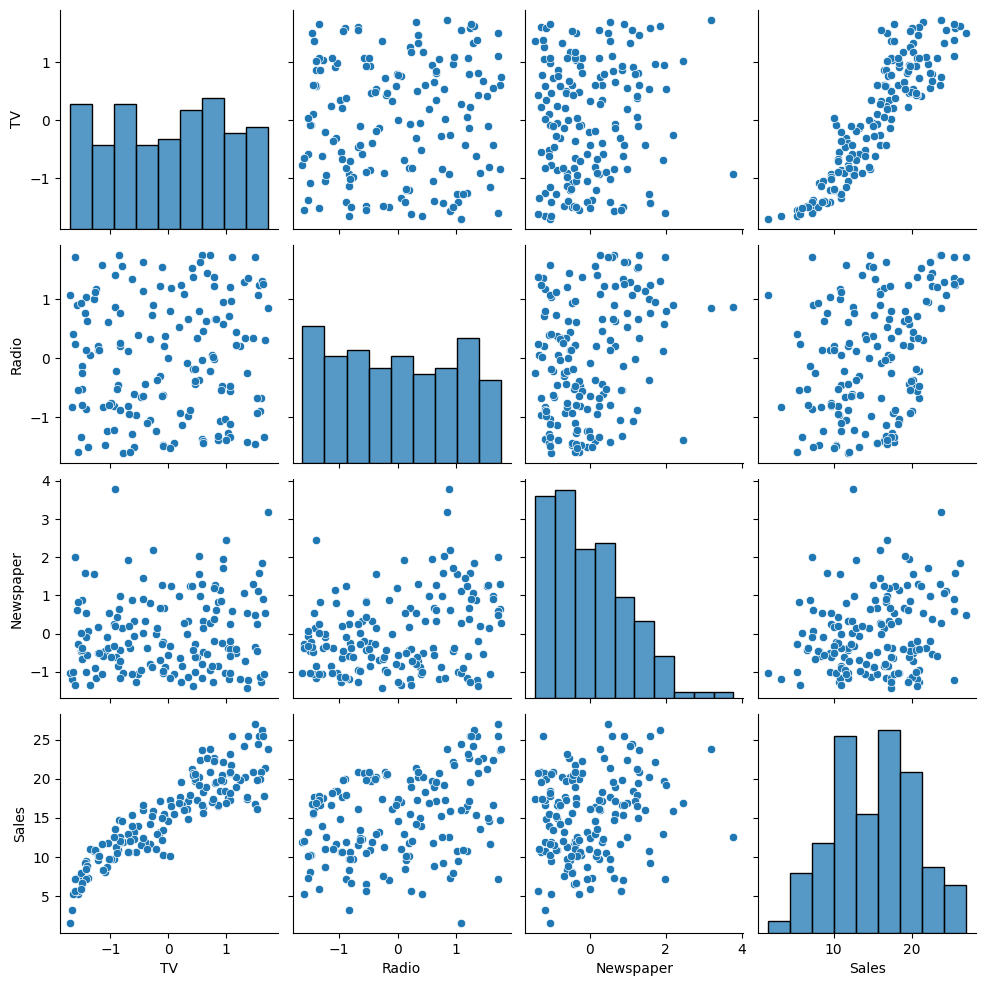

In [93]:
sns.pairplot(data=train_dataset)

<Axes: >

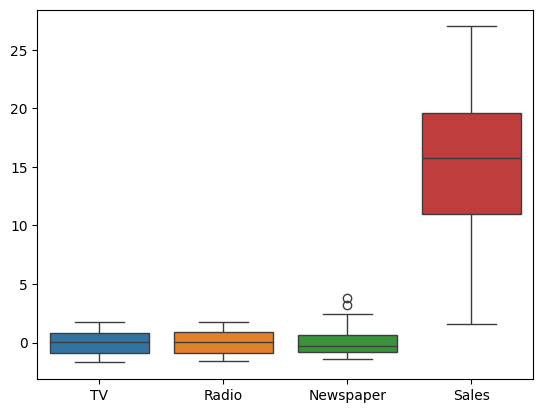

In [94]:
sns.boxplot(data=train_dataset)

In [95]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

train_dataset_1=remove_outlier(train_dataset, 'Newspaper')

<Axes: >

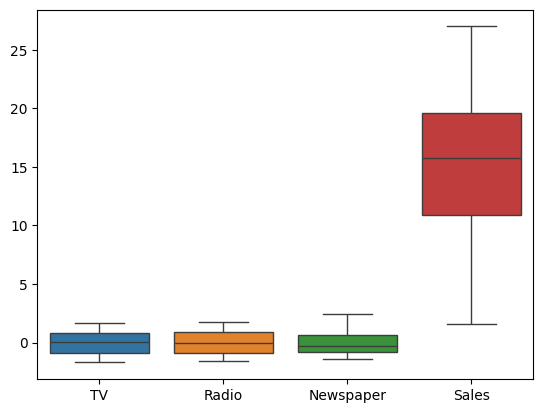

In [96]:
sns.boxplot(data=train_dataset_1)

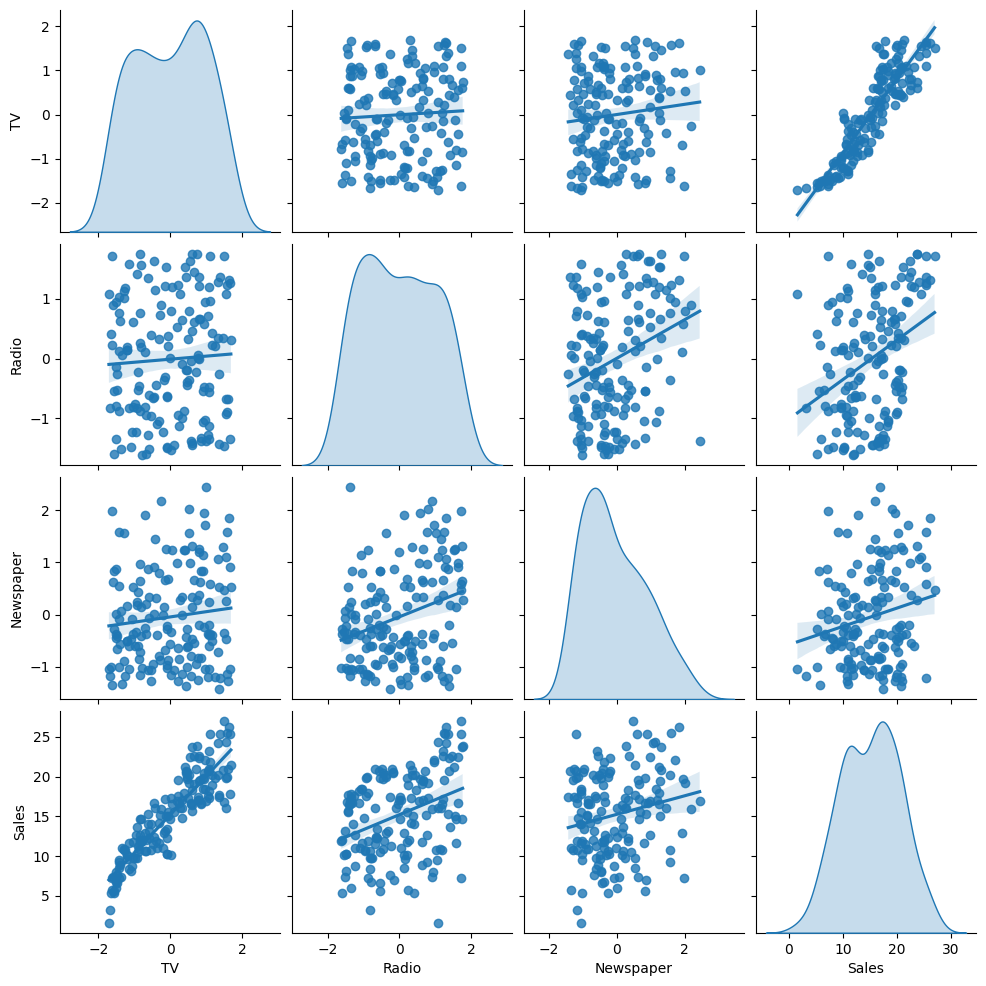

In [97]:
_ = sns.pairplot(train_dataset_1, kind="reg", diag_kind="kde")

<Axes: >

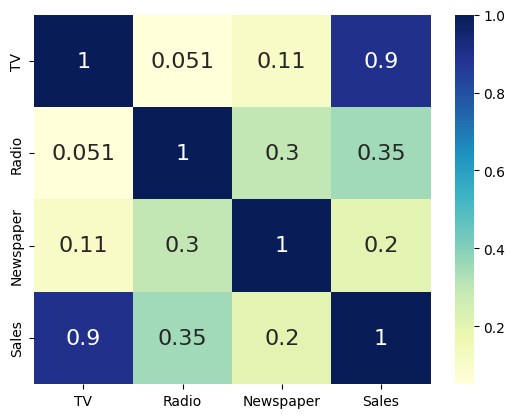

In [98]:
corr=train_dataset_1.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", annot_kws={"size":16})

In [99]:
from sklearn.linear_model import SGDRegressor

model_result = {}
X_train, y_train = train.drop('Sales', axis='columns'), train['Sales']

In [100]:
for feature in X_train.columns:

  regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')),
           ("scaler", StandardScaler()),
           ("sgd", SGDRegressor())])

  regressorSGD.fit(X_train[feature].values.reshape(-1,1), y_train)

  model_result[feature] = regressorSGD

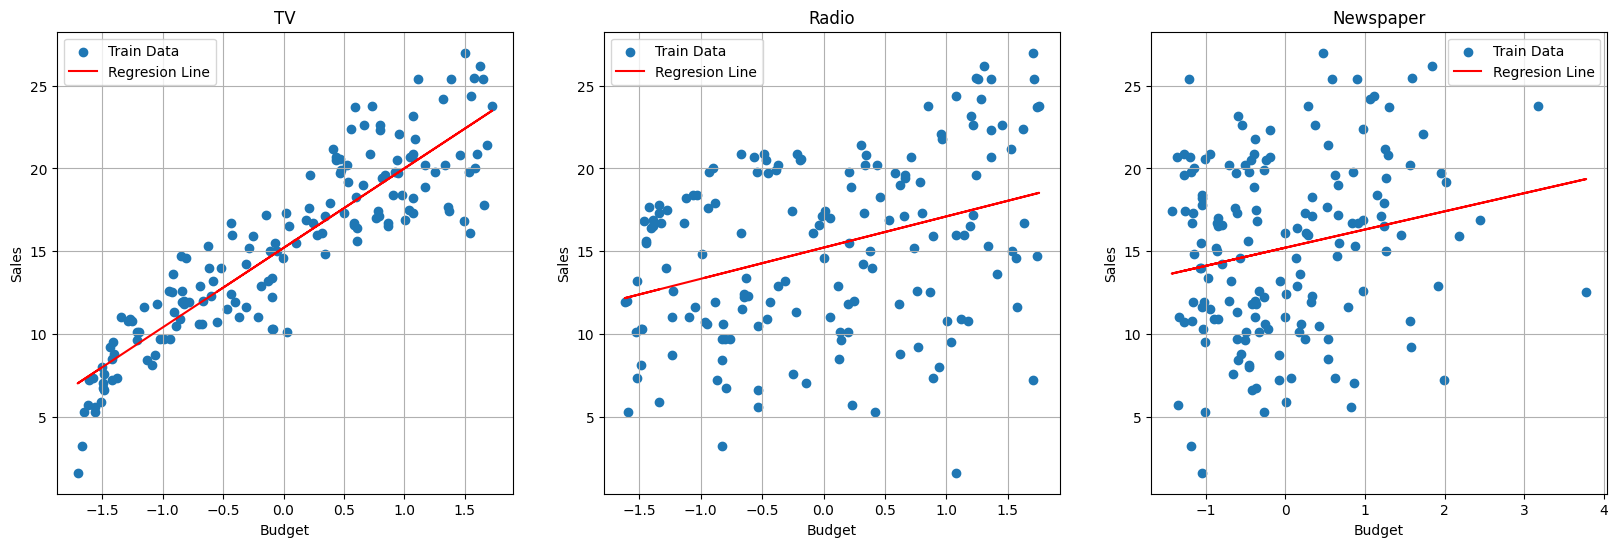

In [101]:
fig, axes = plt.subplots(1, len(X_train.columns), figsize=(20, 6))

for i, feature in enumerate(X_train.columns):
  X_values = X_train[feature].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)

  axes[i].scatter(train_dataset[feature], y_values, label='Train Data')
  model = model_result[feature]
  predicted = model.predict(X_values)

  axes[i].plot(train_dataset[feature], predicted, color='red', label='Regresion Line')
  axes[i].set_title(feature)
  axes[i].set_xlabel('Budget')
  axes[i].set_ylabel('Sales')
  axes[i].grid()
  axes[i].legend()

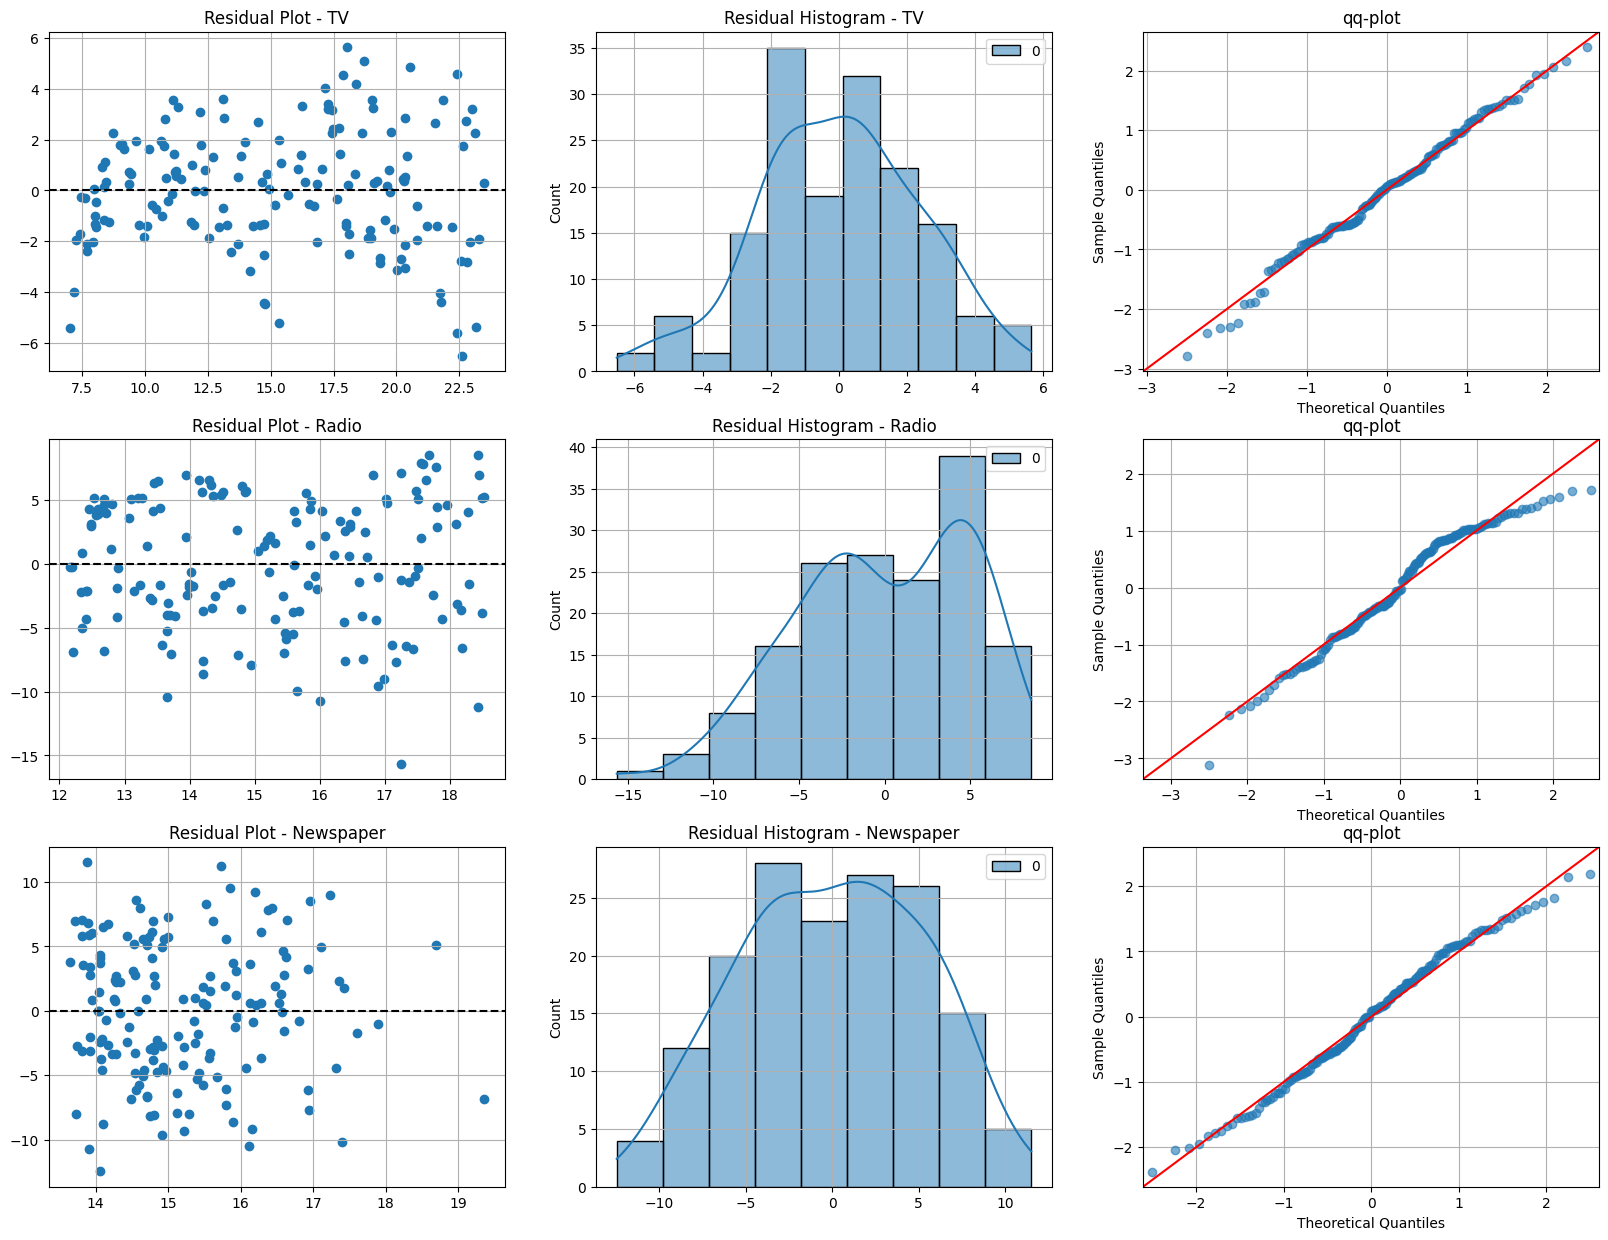

In [102]:
from statsmodels.api import qqplot

selected = ['TV','Radio','Newspaper']
residuals_train = {}
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, feature in enumerate(selected):

  X_values = X_train[feature].values.reshape(-1,1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  y_pred = model.predict(X_values)
  residual =  y_values - y_pred.reshape(-1,1)
  residuals_train[feature] = residual
  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred, residual)
  axes[i][0].set_title('Residual Plot - ' +  feature)
  sns.histplot(residual, kde=True, ax=axes[i][1])
  axes[i][1].set_title('Residual Histogram - ' +  feature)
  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6)
  axes[i][2].set_title('qq-plot')
  axes[i][0].grid()
  axes[i][1].grid()
  axes[i][2].grid()

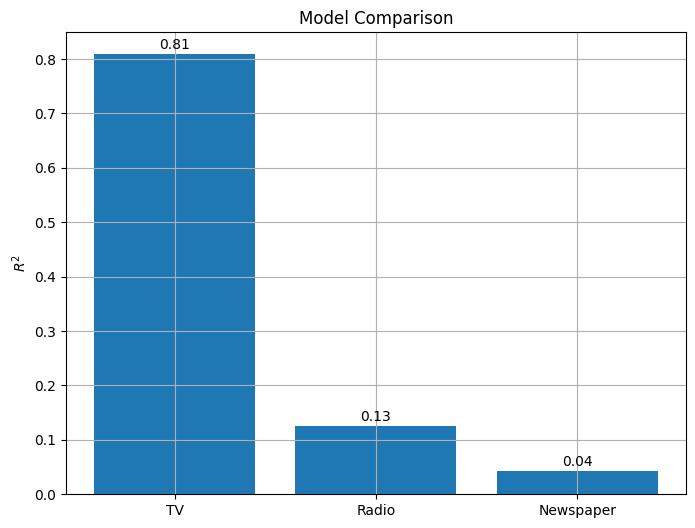

In [103]:
scores = []
for i, feature in enumerate(X_train.columns):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  scores.append(model.score(X_values, y_values))

plt.figure(figsize=(8,6))
plt.bar(X_train.columns, scores)
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(X_train.columns, scores)

In [104]:
from itertools import combinations

all_combinatios = []
model_final = {}
features = ['TV', 'Radio', 'Newspaper']
final_scores = []
for i in range(1, 4):
  all_combinatios += list(combinations(features, i))

all_combinatios = [list(combination) for combination in all_combinatios]
all_combinatios

[['TV'],
 ['Radio'],
 ['Newspaper'],
 ['TV', 'Radio'],
 ['TV', 'Newspaper'],
 ['Radio', 'Newspaper'],
 ['TV', 'Radio', 'Newspaper']]

In [105]:
for combination in all_combinatios:
   sgd = SGDRegressor()
   X_values = X_train[combination].values.reshape(-1, len(combination))
   y_values = y_train.ravel()

   regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')),
           ("scaler", StandardScaler()),
           ("sgd", SGDRegressor())])

   regressorSGD.fit(X_values, y_values)
   y_pred = regressorSGD.predict(X_values)
   model_final[combination.__repr__()] = regressorSGD
   final_scores.append(regressorSGD.score(X_values, y_values))

In [111]:
final_scores

[0.8086275987730047,
 0.12538650546602892,
 0.04190562229225836,
 0.9021674056873866,
 0.8198432196882115,
 0.1352529184410346,
 0.9023088971310518]

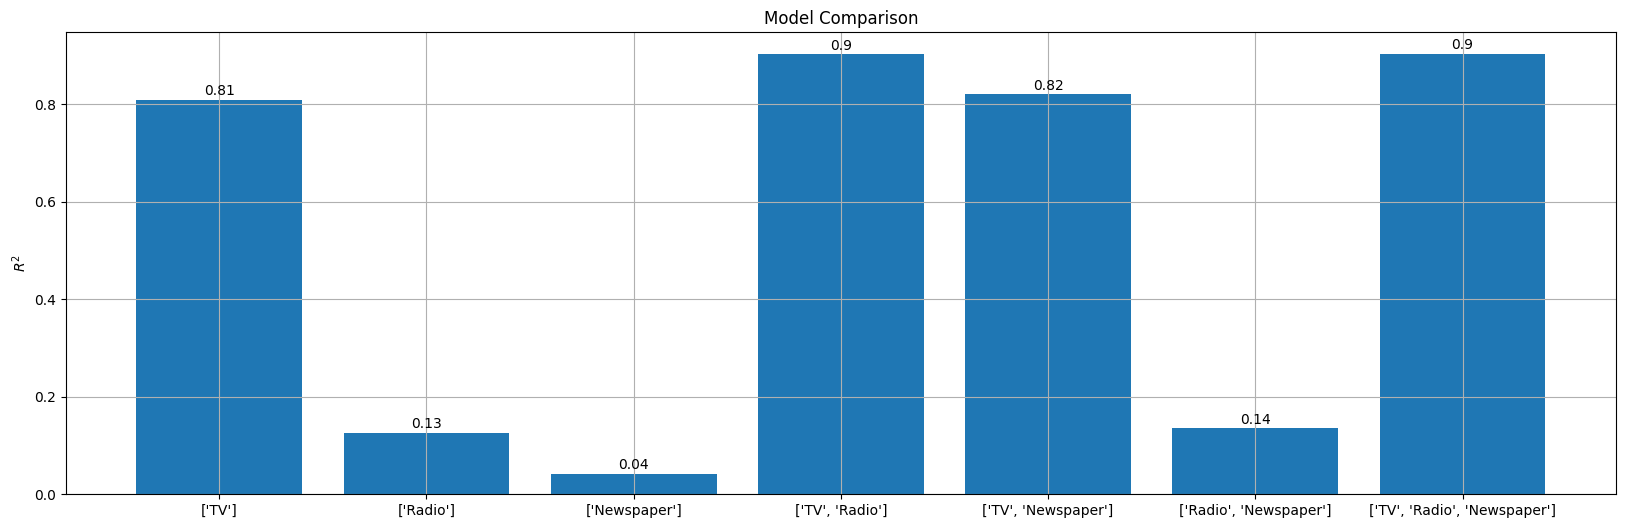

In [107]:
plt.figure(figsize=(20,6))
plt.bar(model_final.keys(), final_scores)
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(model_final.keys(), final_scores)

In [108]:
test_scores = []

X_test, y_test = test.drop('Sales', axis='columns'), test['Sales']

for combination in all_combinatios:

  X_values = X_test[combination].values.reshape(-1,len(combination))
  y_values = y_test.values.reshape(-1, 1)

  model = model_final[combination.__repr__()]
  test_scores.append(model.score(X_values, y_values))

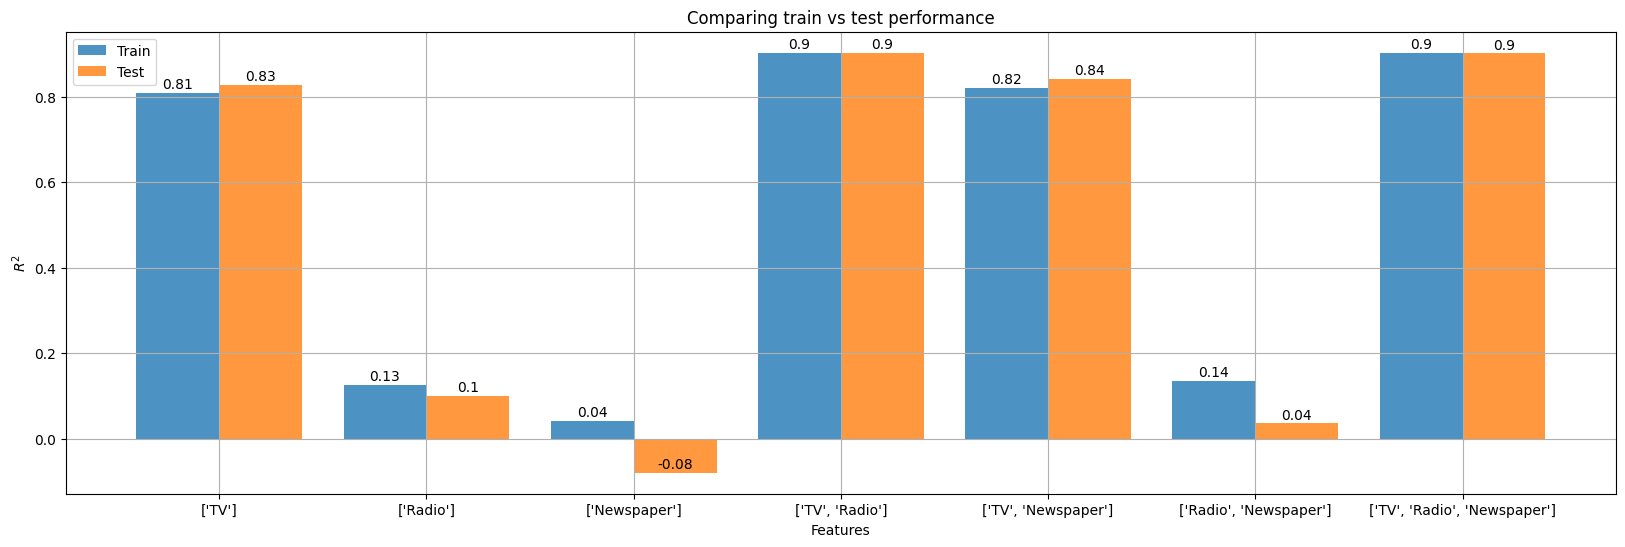

In [109]:
plt.figure(figsize=(20,6))

X_axis = np.arange(len(model_final.keys()))

plt.bar(X_axis - 0.2, final_scores, 0.4, label = 'Train', alpha=0.8)
plt.bar(X_axis + 0.2, test_scores, 0.4, label = 'Test', alpha=0.8)

plt.ylabel('$R^2$')
plt.title('Test Comparison')
plt.grid()
plt.xticks(X_axis, model_final.keys())
plt.xlabel("Features")
plt.title("Comparing train vs test performance")
plt.legend()

def addlabels(x, y, val):
    for i in range(len(x)):
        plt.text(i + val , y[i] + 0.01, round(y[i],2), ha = 'center')

addlabels(model_final.keys(), final_scores, - 0.2)
addlabels(model_final.keys(), test_scores, + 0.2)
plt.show()

C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'colo

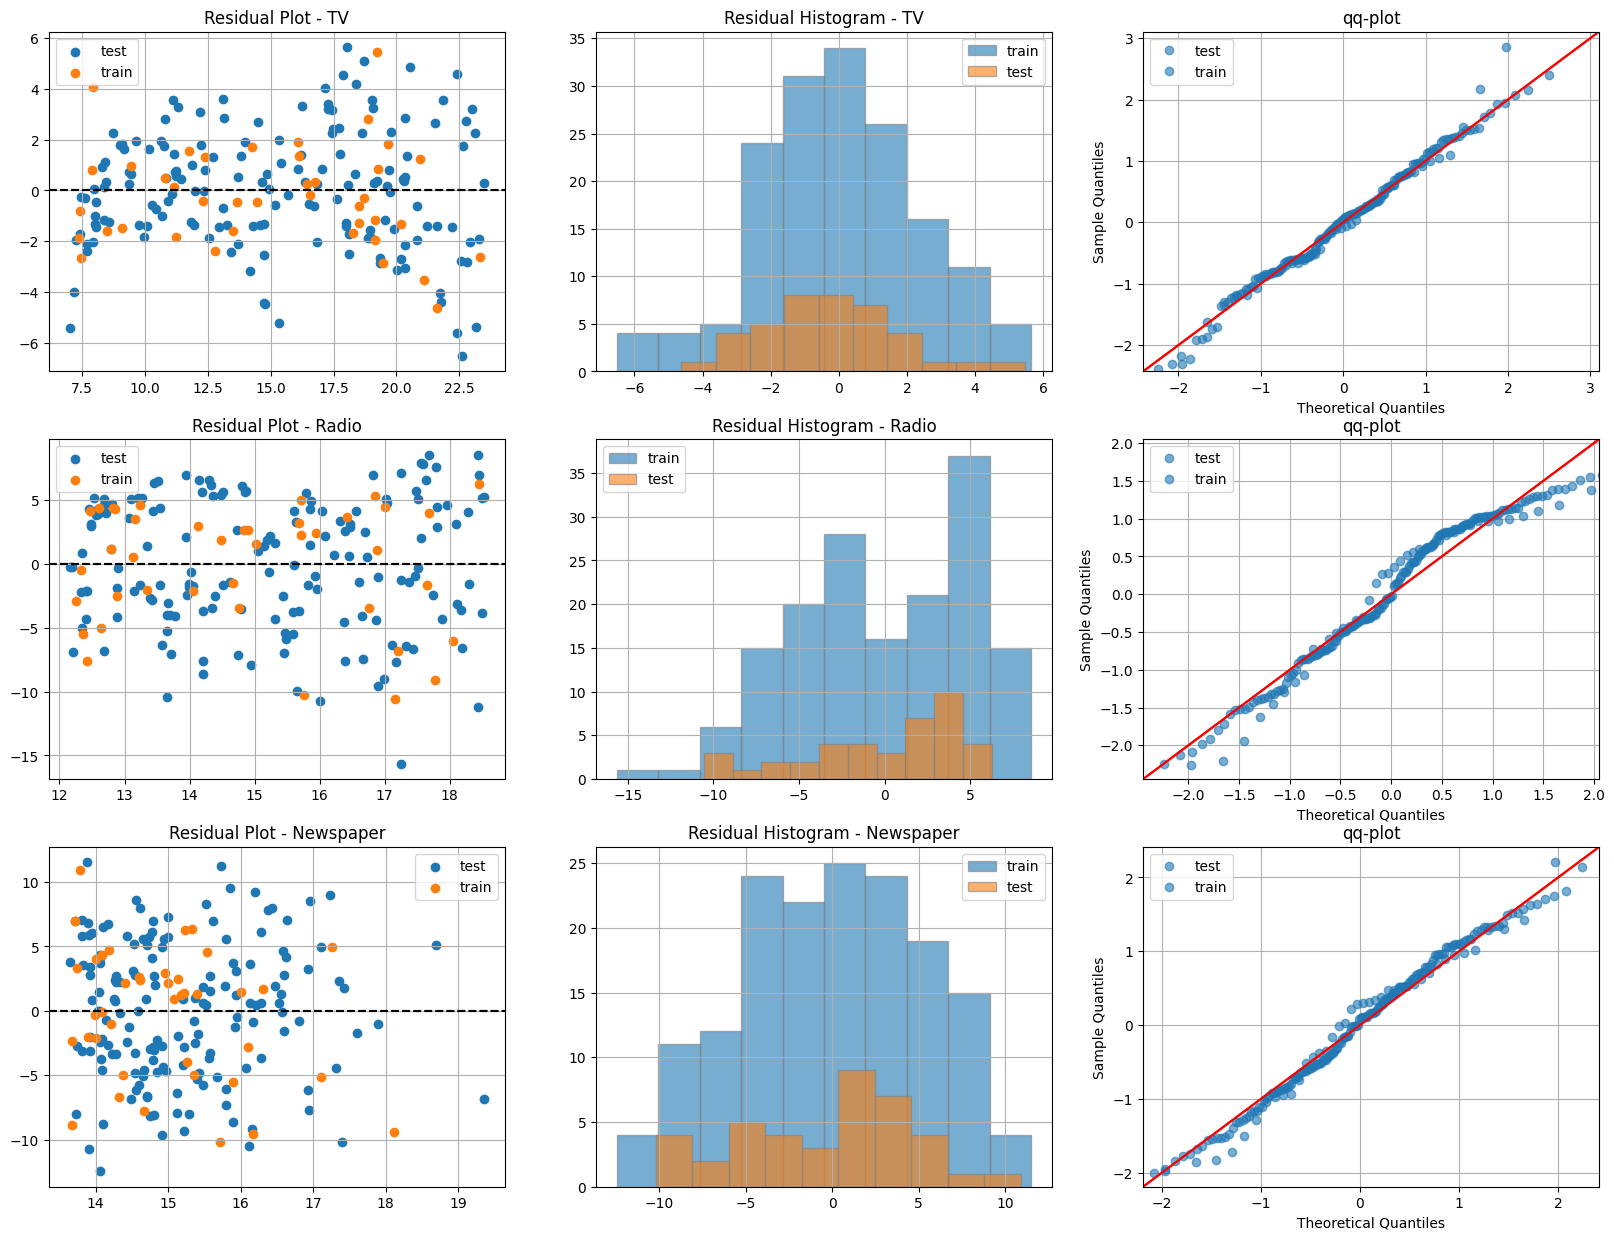

In [110]:
selected = ['TV','Radio','Newspaper']
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, combination in enumerate(selected):

  X_train_values = X_train[combination].values.reshape(-1,1)
  residual_ = residuals_train[combination]

  X_test_values = X_test[combination].values.reshape(-1,1)
  y_values = y_test.values.reshape(-1, 1)
  model = model_result[combination]
  y_pred = model.predict(X_test_values)
  y_pred_ = model.predict(X_train_values)
  residual = y_values - y_pred.reshape(-1,1)
  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred_, residual_, label='test')
  axes[i][0].set_title('Residual Plot - ' +  feature)

  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred, residual, label='train')
  axes[i][0].set_title('Residual Plot - ' +  combination)
  axes[i][0].legend()
  axes[i][0].grid()

  axes[i][1].hist(residual_, alpha= 0.6, ec="grey", label='train')
  axes[i][1].hist(residual, alpha= 0.6, ec="grey", label='test')
  axes[i][1].set_title('Residual Histogram - ' +  combination)
  axes[i][1].legend()
  axes[i][1].grid()

  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, label='test')
  axes[i][2].set_title('qq-plot')
  qqplot(np.sort(residual_.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, color='orange', label='train')
  axes[i][2].set_title('qq-plot')
  axes[i][2].grid()
  axes[i][2].legend()